In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [9]:
# Generate vertices
vertices = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [2, 0],
    [2, 1],
    [3, 0],
    [3, 1]
])

# generate faces
faces = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [1, 4, 5],
    [4, 6, 7],
    [0, 1, 4],
    [1, 2, 5],
    [2, 3, 5],
    [4, 5, 6]
])

In [10]:
# Create xarray dataset
ds = xr.Dataset()

In [11]:
# Add vertices to dataset as coordinates
ds['vertices'] = xr.DataArray(vertices, coords={'nVertices': np.arange(vertices.shape[0]), 'nDim': ['x', 'y']})

# Add faces to dataset
ds['faces'] = xr.DataArray(faces, dims=('nFaces', 'nVerticesPerFace'), attrs={'units': 'vertex index'})

# Add face_nodes as a variable
ds['face_nodes'] = xr.DataArray(faces, dims=('nFaces', 'nVerticesPerFace'))

# Add face_node_connectivity as a variable
face_node_conn = np.repeat(np.arange(faces.shape[0]), faces.shape[1])
ds['face_node_connectivity'] = xr.DataArray(face_node_conn, dims='nConnectivity')

In [12]:
# Add face_node_connectivity as a variable
face_node_conn = np.repeat(np.arange(faces.shape[0]), faces.shape[1])
ds['face_node_connectivity'] = xr.DataArray(face_node_conn, dims='nConnectivity')

In [13]:
# Generate temperature data
temperature = np.array([25.0, 30.0, 27.5, 28.8, 31.2, 26.7, 29.5, 32.0])

# Add temperature data as a variable
ds['temperature'] = xr.DataArray(temperature, dims=('nVertices',), coords={'nVertices': np.arange(vertices.shape[0])})

In [14]:
ds

<xarray.Dataset>
Dimensions:                 (nVertices: 8, nDim: 2, nFaces: 8,
                             nVerticesPerFace: 3, nConnectivity: 24)
Coordinates:
  * nVertices               (nVertices) int64 0 1 2 3 4 5 6 7
  * nDim                    (nDim) <U1 'x' 'y'
Dimensions without coordinates: nFaces, nVerticesPerFace, nConnectivity
Data variables:
    vertices                (nVertices, nDim) int64 0 0 1 0 1 1 ... 2 1 3 0 3 1
    faces                   (nFaces, nVerticesPerFace) int64 0 1 2 0 ... 5 4 5 6
    face_nodes              (nFaces, nVerticesPerFace) int64 0 1 2 0 ... 5 4 5 6
    face_node_connectivity  (nConnectivity) int64 0 0 0 1 1 1 2 ... 6 6 6 7 7 7
    temperature             (nVertices) float64 25.0 30.0 27.5 ... 29.5 32.0

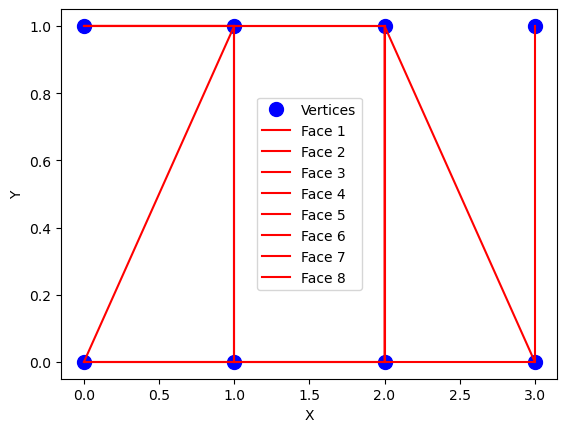

In [15]:
# Plot vertices and faces
fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'bo', markersize=10, label='Vertices')
for i in range(faces.shape[0]):
    ax.plot(vertices[faces[i, :], 0], vertices[faces[i, :], 1], 'r-', label=f'Face {i+1}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

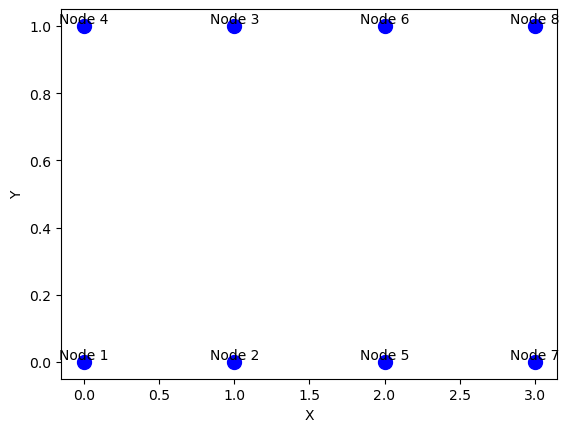

In [16]:
# Plot vertices
fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'bo', markersize=10)
for i, vertex in enumerate(vertices):
    ax.text(vertex[0], vertex[1], f'Node {i+1}', ha='center', va='bottom')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [8]:
# Write dataset to NetCDF file
ds.to_netcdf('small_mesh.nc')